In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gt_path = r"D:\DevHub\Projects\Freelance Projects\crop_classification_satitite_images\data\gt"
rs_path = r"D:\DevHub\Projects\Freelance Projects\crop_classification_satitite_images\data\rs"

gt_files = sorted(os.listdir(gt_path))
rs_files = sorted(os.listdir(rs_path))

In [3]:
gt_data = [np.load(os.path.join(gt_path, file)) for file in gt_files]
rs_data = [np.load(os.path.join(rs_path, file)) for file in rs_files]

In [4]:
gt_data = np.array(gt_data)
rs_data = np.array(rs_data)

In [5]:
print(gt_data[1])

[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]]


In [6]:
rs_data[1]

array([[[0.08774506, 0.08226737, 0.08798696, ..., 0.1686836 ,
         0.21399528, 0.07860719],
        [0.08774506, 0.08912298, 0.11548289, ..., 0.1686836 ,
         0.21399528, 0.19651799],
        [0.08774506, 0.13711227, 0.11548289, ..., 0.13494688,
         0.14266351, 0.11791079],
        ...,
        [0.11699341, 0.08912298, 0.06599022, ..., 0.4723141 ,
         0.46365643, 0.43233955],
        [0.04874725, 0.06855614, 0.06599022, ..., 0.5060508 ,
         0.39232466, 0.35373238],
        [0.05849671, 0.10283421, 0.08798696, ..., 0.5060508 ,
         0.4993223 , 0.47164318]],

       [[0.07799561, 0.10968982, 0.08798696, ..., 0.13494688,
         0.28532702, 0.15721439],
        [0.08774506, 0.12340105, 0.10448451, ..., 0.1686836 ,
         0.1783294 , 0.23582159],
        [0.11699341, 0.08912298, 0.09898534, ..., 0.26989377,
         0.21399528, 0.31442878],
        ...,
        [0.11699341, 0.08912298, 0.07698859, ..., 0.3373672 ,
         0.46365643, 0.47164318],
        [0.0

In [7]:
if all(img.shape == rs_data[0].shape for img in rs_data):
    rs_data = np.array(rs_data)
else:
    print("Error: Files have inconsistent shapes, cannot convert to a single NumPy array.")

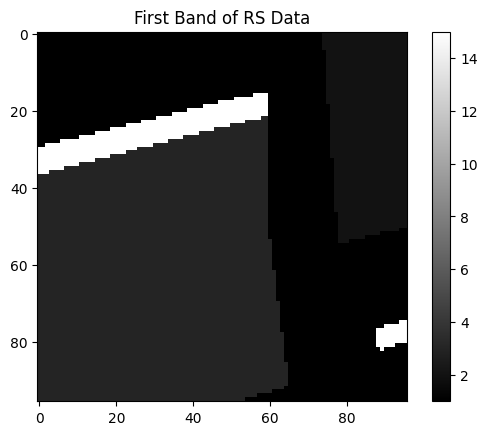

In [8]:
image = gt_data[1]

plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title("First Band of RS Data")
plt.show()


In [9]:
gt_data

array([[[ 3.,  3.,  3., ..., 19., 19., 19.],
        [ 3.,  3.,  3., ..., 19., 19., 19.],
        [ 3.,  3.,  3., ..., 19., 19., 19.],
        ...,
        [ 3.,  3.,  3., ..., 15., 15., 15.],
        [ 2.,  2.,  2., ..., 15., 15., 15.],
        [ 2.,  2.,  2., ..., 15., 15., 15.]],

       [[ 1.,  1.,  1., ...,  2.,  2.,  2.],
        [ 1.,  1.,  1., ...,  2.,  2.,  2.],
        [ 1.,  1.,  1., ...,  2.,  2.,  2.],
        ...,
        [ 3.,  3.,  3., ...,  1.,  1.,  1.],
        [ 3.,  3.,  3., ...,  1.,  1.,  1.],
        [ 3.,  3.,  3., ...,  1.,  1.,  1.]],

       [[20., 20., 20., ...,  0.,  0.,  0.],
        [20., 20., 20., ...,  0.,  0.,  0.],
        [20., 20., 20., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.

In [10]:
rs_data

array([[[[0.0389978 , 0.05484491, 0.04399348, ..., 0.3036305 ,
          0.42799056, 0.47164318],
         [0.06824615, 0.07541176, 0.05499185, ..., 0.3373672 ,
          0.3566588 , 0.23582159],
         [0.06824615, 0.05484491, 0.0384943 , ..., 0.37110394,
          0.39232466, 0.27512518],
         ...,
         [0.07799561, 0.06170053, 0.05499185, ..., 0.26989377,
          0.3209929 , 0.23582159],
         [0.09749451, 0.06170053, 0.06599022, ..., 0.1686836 ,
          0.28532702, 0.11791079],
         [0.05849671, 0.06170053, 0.04949267, ..., 0.3036305 ,
          0.28532702, 0.19651799]],

        [[0.07799561, 0.07541176, 0.06049104, ..., 0.4723141 ,
          0.42799056, 0.43233955],
         [0.04874725, 0.06170053, 0.05499185, ..., 0.3036305 ,
          0.28532702, 0.27512518],
         [0.09749451, 0.06170053, 0.05499185, ..., 0.43857738,
          0.46365643, 0.39303598],
         ...,
         [0.05849671, 0.0959786 , 0.05499185, ..., 0.23615704,
          0.3209929 , 0.2

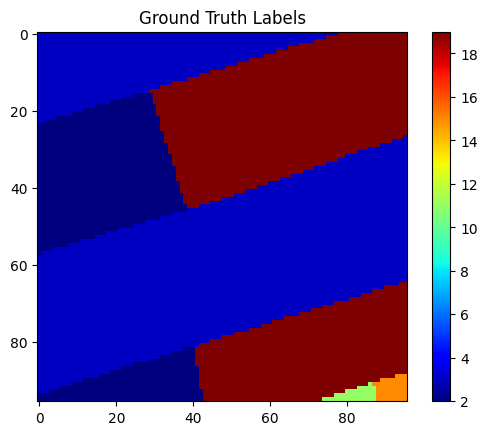

In [11]:
plt.imshow(gt_data[0], cmap="jet")
plt.colorbar()
plt.title("Ground Truth Labels")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_2968\3091201313.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet", len(unique_labels))


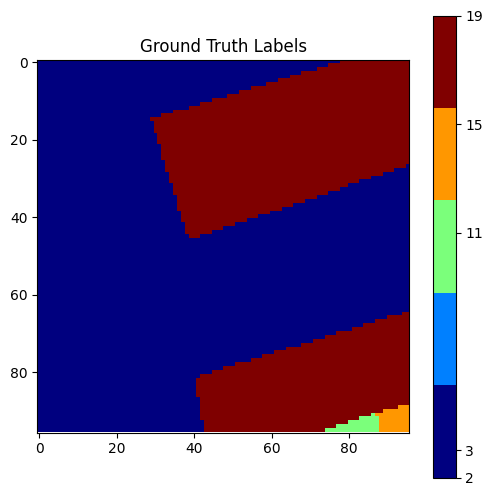

In [12]:
gt_image = gt_data[0]
unique_labels = np.unique(gt_image)
cmap = plt.cm.get_cmap("jet", len(unique_labels))
plt.figure(figsize=(6, 6))
plt.imshow(gt_image, cmap=cmap)
plt.colorbar(ticks=unique_labels) 
plt.title("Ground Truth Labels")
plt.show()

In [13]:
def analyze_data(rs_data, gt_data):
    print("Image Data (rs_data) Analysis**")
    print("Shape:", rs_data.shape)
    print("Data Type:", rs_data.dtype)
    print("Min-Max Pixel Values:", np.min(rs_data), "-", np.max(rs_data))

    print("\nGround Truth Data (gt_data) Analysis**")
    print("Shape:", gt_data.shape)
    print("Data Type:", gt_data.dtype)
    
    unique_labels = np.unique(gt_data)
    print("Unique Labels:", unique_labels)
    print("Number of Classes:", len(unique_labels))
    
    if len(gt_data.shape) == 4 and gt_data.shape[-1] > 1:
        print("Labels are already one-hot encoded.")
    else:
        print("Labels are not one-hot encoded. Need conversion using `to_categorical()`.")

    if len(rs_data.shape) == 4:
        print("\nData is correctly shaped for U-Net: (batch_size, height, width, channels)")
    else:
        print("\nData needs reshaping to (batch_size, height, width, channels)")

analyze_data(rs_data, gt_data)

Image Data (rs_data) Analysis**
Shape: (87, 96, 96, 200)
Data Type: float32
Min-Max Pixel Values: 0.0 - 1.5102093

Ground Truth Data (gt_data) Analysis**
Shape: (87, 96, 96)
Data Type: float32
Unique Labels: [ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 22. 23. 24. 25. 26. 28. 29.]
Number of Classes: 27
Labels are not one-hot encoded. Need conversion using `to_categorical()`.

Data is correctly shaped for U-Net: (batch_size, height, width, channels)


In [14]:
gt_data = gt_data.astype(int)
num_classes = int(gt_data.max() + 1)  
print(f"Number of Classes: {num_classes}")  
gt_data = keras.utils.to_categorical(gt_data, num_classes=num_classes)
print(f"Updated gt_data Shape: {gt_data.shape}")  

Number of Classes: 30
Updated gt_data Shape: (87, 96, 96, 30)


In [15]:

def unet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv3)

    up1 = layers.UpSampling2D((2, 2))(conv3)
    up1 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(up1)
    merge1 = layers.concatenate([up1, conv2])

    up2 = layers.UpSampling2D((2, 2))(merge1)
    up2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(up2)
    merge2 = layers.concatenate([up2, conv1])

    outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(merge2)

    return keras.Model(inputs, outputs)

input_shape = (96, 96, 200)  
num_classes = 30
model = unet_model(input_shape, num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96,    │          0 │ -                 │
│ (InputLayer)        │ 200)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 96, 96,    │    115,264 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 96, 96,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 48, 48,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 48, 48,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 48, 48,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 24, 24,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 24, 24,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 24,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 48, 48,    │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 48, 48,    │    295,040 │ up_sampling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48, 48,    │          0 │ conv2d_6[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 96, 96,    │          0 │ concatenate[0][0] │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 96, 96,    │    147,520 │ up_sampling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 96, 96,    │          0 │ conv2d_7[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 96, 96,    │      3,870 │ concatenate_1[0]… │
│                     │ 30)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,705,310 (6.51 MB)

 Trainable params: 1,705,310 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(rs_data, gt_data, test_size=0.2, random_state=42)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=8,  
    epochs=20 
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.1833 - loss: 3.3012 - val_accuracy: 0.1367 - val_loss: 2.4957
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.2292 - loss: 2.5415 - val_accuracy: 0.3915 - val_loss: 2.1086
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3952 - loss: 2.2158 - val_accuracy: 0.4419 - val_loss: 1.8253
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4678 - loss: 1.8817 - val_accuracy: 0.4462 - val_loss: 1.7743
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4899 - loss: 1.6890 - val_accuracy: 0.5136 - val_loss: 1.7305
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5057 - loss: 1.6957 - val_accuracy: 0.4872 - val_loss: 1.8395
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5572 - loss: 1.5741 - val_accuracy: 0.4624 - val_loss: 1.8454
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5052 - loss: 1.6803 - val_accuracy: 0.4455 - val_loss: 1.8288
Epoch 9/

In [17]:
model.save("model/unet_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


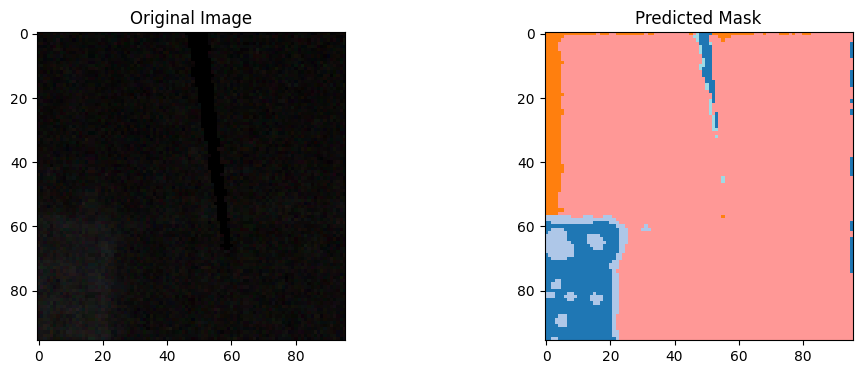

In [33]:
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]  
true_mask = np.argmax(y_test[idx], axis=-1)  

predicted_mask = model.predict(sample_image[np.newaxis, ...])
predicted_mask = np.argmax(predicted_mask, axis=-1).squeeze()  

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[:, :, :3])  

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap="tab20")  
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


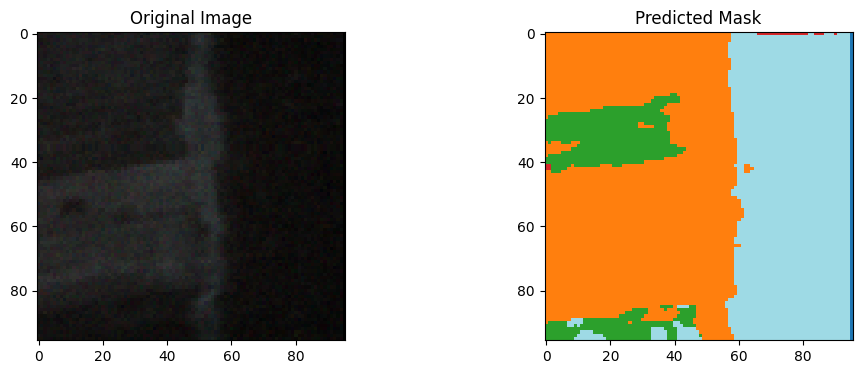

In [19]:
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]  
true_mask = np.argmax(y_test[idx], axis=-1)  

predicted_mask = model.predict(sample_image[np.newaxis, ...])
predicted_mask = np.argmax(predicted_mask, axis=-1).squeeze()  

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[:, :, :3])  

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap="tab20")  

plt.show()